In [235]:
from __future__ import absolute_import,division,print_function,unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot  as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
# from download import download
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [236]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  1599 non-null   object 
 1   To Date    1599 non-null   object 
 2   PM2.5      1579 non-null   float64
 3   PM10       1583 non-null   float64
 4   NO         1582 non-null   float64
 5   NO2        1582 non-null   float64
 6   Nox        1582 non-null   float64
 7   NH3        1567 non-null   float64
 8   SO2        1566 non-null   float64
 9   CO         1580 non-null   float64
 10  Ozone      1538 non-null   float64
 11  Benzene    1484 non-null   float64
 12  Toluene    1484 non-null   float64
 13  RH         1583 non-null   float64
 14  WD         1583 non-null   float64
 15  SR         1583 non-null   float64
 16  BP         1582 non-null   float64
 17  AT         1582 non-null   float64
 18  Xylene     1482 non-null   float64
 19  TOT-RF     1599 non-null   float64
dtypes: float

In [237]:
# Convert the date column to datetime
data['From Date'] = data['From Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data['To Date'] = data['To Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['From Date'].min(), data['From Date'].max()

(Timestamp('2018-11-11 00:00:00'), Timestamp('2023-03-28 00:00:00'))

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  1599 non-null   datetime64[ns]
 1   To Date    1599 non-null   datetime64[ns]
 2   PM2.5      1579 non-null   float64       
 3   PM10       1583 non-null   float64       
 4   NO         1582 non-null   float64       
 5   NO2        1582 non-null   float64       
 6   Nox        1582 non-null   float64       
 7   NH3        1567 non-null   float64       
 8   SO2        1566 non-null   float64       
 9   CO         1580 non-null   float64       
 10  Ozone      1538 non-null   float64       
 11  Benzene    1484 non-null   float64       
 12  Toluene    1484 non-null   float64       
 13  RH         1583 non-null   float64       
 14  WD         1583 non-null   float64       
 15  SR         1583 non-null   float64       
 16  BP         1582 non-null   float64       


In [239]:
data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
0,2018-11-11,2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
1,2018-11-12,2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2,2018-11-13,2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
3,2018-11-14,2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
4,2018-11-15,2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


In [240]:
aq_df = data.set_index('To Date')
aq_df.drop(['From Date'], axis=1, inplace=True)
aq_df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
To Date,,,,,,,,,,,,,,,,,,
2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


# Handling Missing Values in Time Series Data

time series is data points order in time

time series data is often missing values due to shutting off of the sensor or other reasons

we can use interpolation to fill in the missing values
what is interpolation?
interpolation is a method of constructing new data points within the range of a discrete set of known data points

we cannot drop the missing values because we will lose the information 

we cannot use glodal mean or median to fill in the missing values because it will change the trend of the data. we can mess up the data. Example: if we have a time series data of temperature and we use the global mean to fill in the missing values, we will get a flat line. this create aa distribution mismatch

We now see what we can do ?



In [241]:
print(aq_df.shape)
print(aq_df.isna().sum())

(1599, 18)
PM2.5       20
PM10        16
NO          17
NO2         17
Nox         17
NH3         32
SO2         33
CO          19
Ozone       61
Benzene    115
Toluene    115
RH          16
WD          16
SR          16
BP          17
AT          17
Xylene     117
TOT-RF       0
dtype: int64


In [242]:
import plotly.express as px
fig = px.line(data,x='From Date',y='Ozone',title='Ozone with Slider')

fig.update_xaxes( 
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label="1y",step="month",stepmode="backward"),
            dict(count=2,label="2y",step="month",stepmode="backward"),
            dict(count=3,label="3y",step="year",stepmode="backward"), # YTD = year to date it means from 1st jan to current date
            dict(count=1,label="ytd",step="year",stepmode="todate"),
            dict(step="all")
        ])
    )
)
fig.show()


In [243]:
print("Rows: ",aq_df.shape[0])
print("Columns: ",aq_df.shape[1])
print("Features: ",aq_df.columns.tolist())
print("Missing values: ",aq_df.isnull().values.any())
print("Unique values: ",aq_df.nunique())


Rows:  1599
Columns:  18
Features:  ['PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WD', 'SR', 'BP', 'AT', 'Xylene', 'TOT-RF']
Missing values:  True
Unique values:  PM2.5      1522
PM10       1544
NO         1030
NO2        1392
Nox        1369
NH3        1295
SO2        1156
CO          220
Ozone      1375
Benzene     559
Toluene    1182
RH         1337
WD         1508
SR         1508
BP         1134
AT         1173
Xylene      401
TOT-RF       76
dtype: int64


In [244]:
# return missing values 
aq_df.isnull().sum()

PM2.5       20
PM10        16
NO          17
NO2         17
Nox         17
NH3         32
SO2         33
CO          19
Ozone       61
Benzene    115
Toluene    115
RH          16
WD          16
SR          16
BP          17
AT          17
Xylene     117
TOT-RF       0
dtype: int64

In [245]:
aq_df.drop(['TOT-RF'], axis=1, inplace=True)
aq_df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'RH', 'WD', 'SR', 'BP', 'AT', 'Xylene'],
      dtype='object')

array([<AxesSubplot: xlabel='To Date'>, <AxesSubplot: xlabel='To Date'>,
       <AxesSubplot: xlabel='To Date'>, <AxesSubplot: xlabel='To Date'>,
       <AxesSubplot: xlabel='To Date'>, <AxesSubplot: xlabel='To Date'>,
       <AxesSubplot: xlabel='To Date'>, <AxesSubplot: xlabel='To Date'>,
       <AxesSubplot: xlabel='To Date'>, <AxesSubplot: xlabel='To Date'>,
       <AxesSubplot: xlabel='To Date'>, <AxesSubplot: xlabel='To Date'>,
       <AxesSubplot: xlabel='To Date'>, <AxesSubplot: xlabel='To Date'>,
       <AxesSubplot: xlabel='To Date'>, <AxesSubplot: xlabel='To Date'>,
       <AxesSubplot: xlabel='To Date'>], dtype=object)

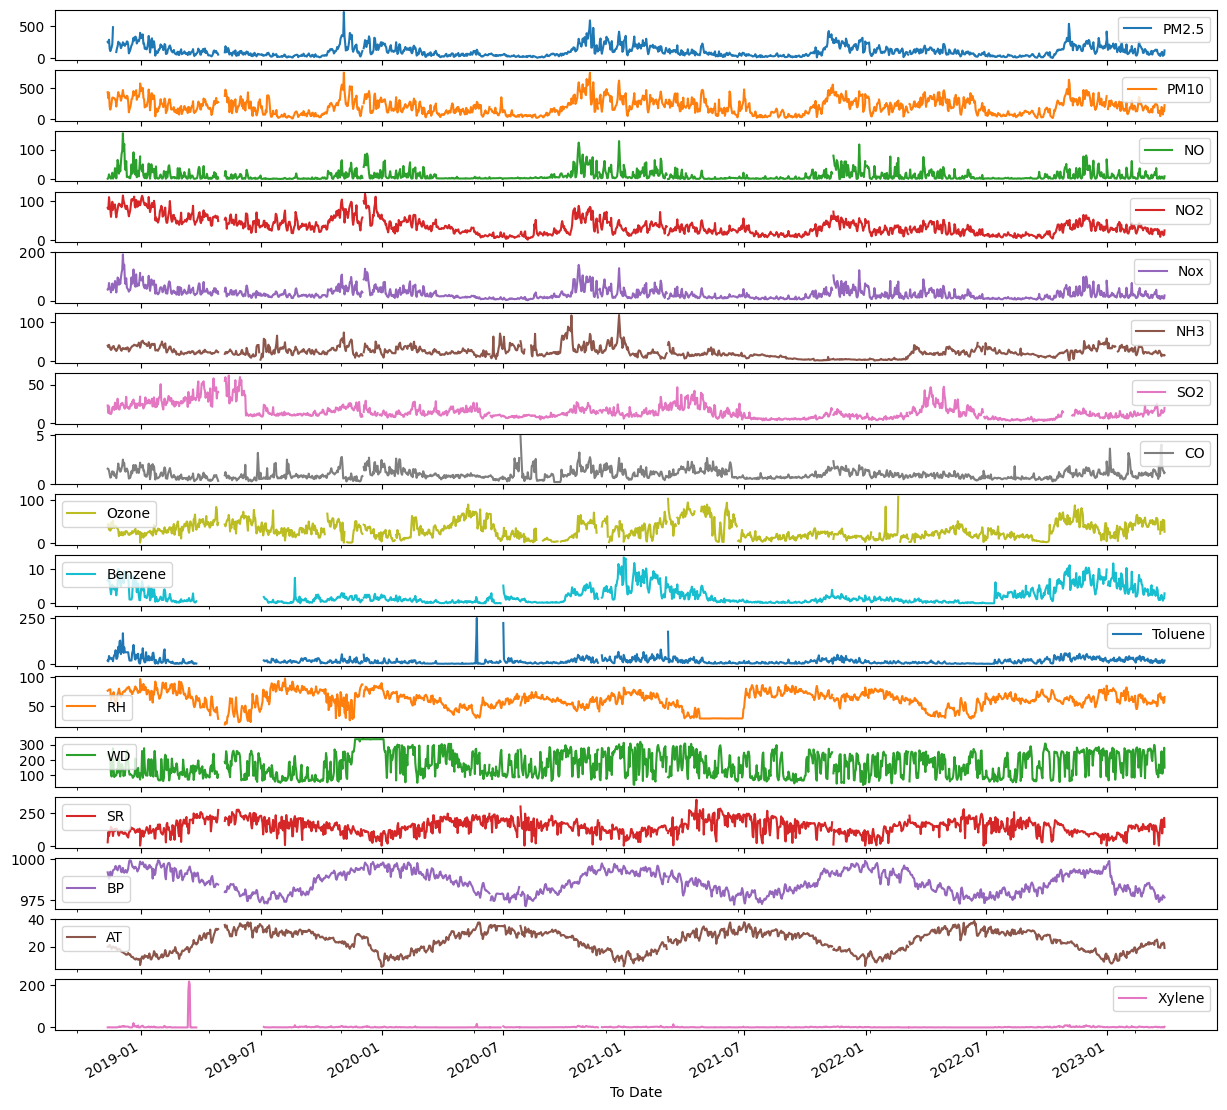

In [246]:
aq_df.plot(subplots=True, figsize=(15, 15))

In [247]:
print("Rows: ",aq_df.shape[0])
print("Columns: ",aq_df.shape[1])
print("Features: ",aq_df.columns.tolist())
print("Missing values: ",aq_df.isnull().any())
print("Unique values: ",aq_df.nunique())

Rows:  1599
Columns:  17
Features:  ['PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WD', 'SR', 'BP', 'AT', 'Xylene']
Missing values:  PM2.5      True
PM10       True
NO         True
NO2        True
Nox        True
NH3        True
SO2        True
CO         True
Ozone      True
Benzene    True
Toluene    True
RH         True
WD         True
SR         True
BP         True
AT         True
Xylene     True
dtype: bool
Unique values:  PM2.5      1522
PM10       1544
NO         1030
NO2        1392
Nox        1369
NH3        1295
SO2        1156
CO          220
Ozone      1375
Benzene     559
Toluene    1182
RH         1337
WD         1508
SR         1508
BP         1134
AT         1173
Xylene      401
dtype: int64


In [248]:
# fill missing values with a value at the same time one day ago
aq_df.fillna(method='ffill', inplace=True)

In [249]:
from feature_engine.selection import DropDuplicateFeatures,DropCorrelatedFeatures,DropConstantFeatures,SmartCorrelatedSelection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,n_jobs=4)
pip = Pipeline([('Constant',DropConstantFeatures(tol=0.98, variables=None)),('Duplicate',DropDuplicateFeatures(variables=None)),('Smart',SmartCorrelatedSelection(selection_method='variance',estimator=rf))])
new_df = pip.fit_transform(aq_df,aq_df['Ozone'])
new_df.head()

,PM10,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene
To Date,,,,,,,,,,,,,,,
2018-11-12,439.83,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31
2018-11-13,340.70,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31
2018-11-14,428.91,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91
2018-11-15,205.45,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54
2018-11-16,154.94,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57


In [250]:
print("Rows: ",new_df.shape[0])
print("Columns: ",new_df.shape[1])


Rows:  1599
Columns:  15


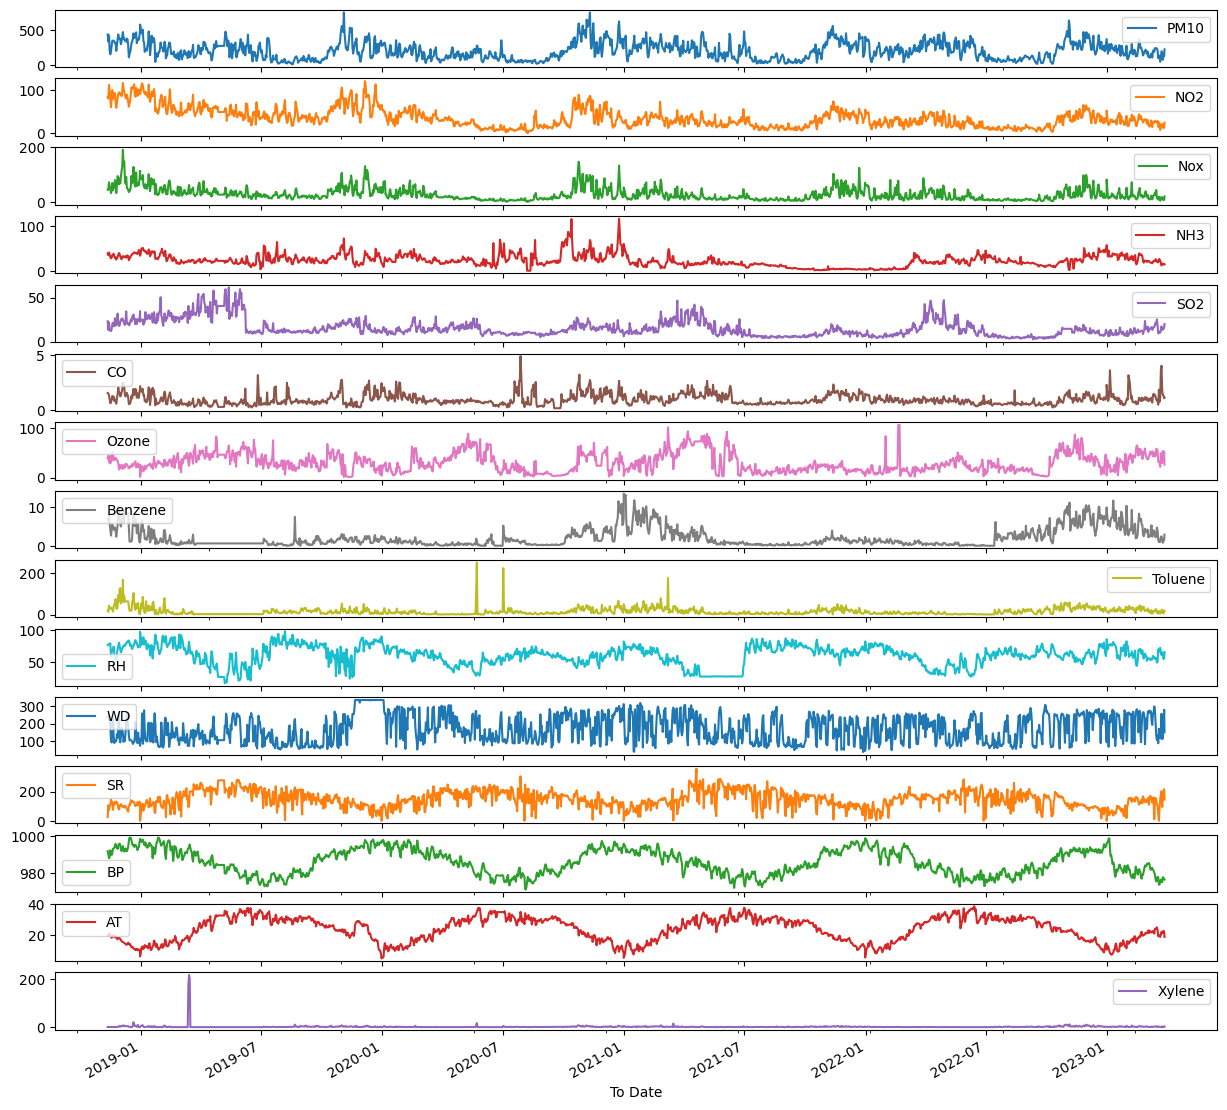

In [251]:
new_df.plot(subplots=True, figsize=(15, 15))
plt.show()

In [252]:
new_df.resample('M').mean() # resample the data to monthly

,PM10,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene
To Date,,,,,,,,,,,,,,,
2018-11-30,323.706842,84.172105,60.793158,33.941579,19.023158,1.182632,36.718421,5.514211,43.727895,69.583684,164.728421,107.531579,992.887368,19.219474,0.852632
2018-12-31,361.376250,91.730000,84.463437,35.126562,24.010938,1.479375,23.208750,5.142500,52.811563,76.979687,129.014688,106.831875,994.923125,13.214063,3.833750
2019-01-31,284.857667,83.181667,59.628000,39.622000,27.876667,1.167667,25.215333,2.555333,27.696667,75.156667,136.938000,117.631333,995.499000,12.851667,1.839333
2019-02-28,193.110000,61.357143,43.202143,29.573929,27.134286,0.905000,30.952143,1.178214,13.218571,80.734286,141.242857,120.320714,993.276786,15.133214,0.912143
2019-03-31,171.557742,56.071935,40.594516,21.231290,32.233226,0.629032,40.113871,0.776452,6.339355,67.325806,125.369677,188.857097,990.865484,19.658065,19.231290
2019-04-30,228.270333,56.315333,36.298000,22.337000,39.750667,0.601333,49.241667,0.610000,2.070000,46.815667,124.828000,216.510000,985.767667,28.582000,0.000000
2019-05-31,259.084839,48.356452,31.389032,21.036129,42.019032,0.585161,45.801290,0.610000,2.070000,35.939032,181.991290,233.873226,982.665484,32.050000,0.000000
2019-06-30,218.334000,41.905667,27.335333,20.749000,19.125000,0.753667,50.489000,0.610000,2.070000,45.710000,141.579667,214.848000,977.963667,34.035667,0.000000
2019-07-31,130.844516,39.626129,22.760645,28.982903,13.418387,0.840323,31.006452,0.610000,12.387097,73.228065,107.723226,159.340323,976.546774,31.040000,0.563871


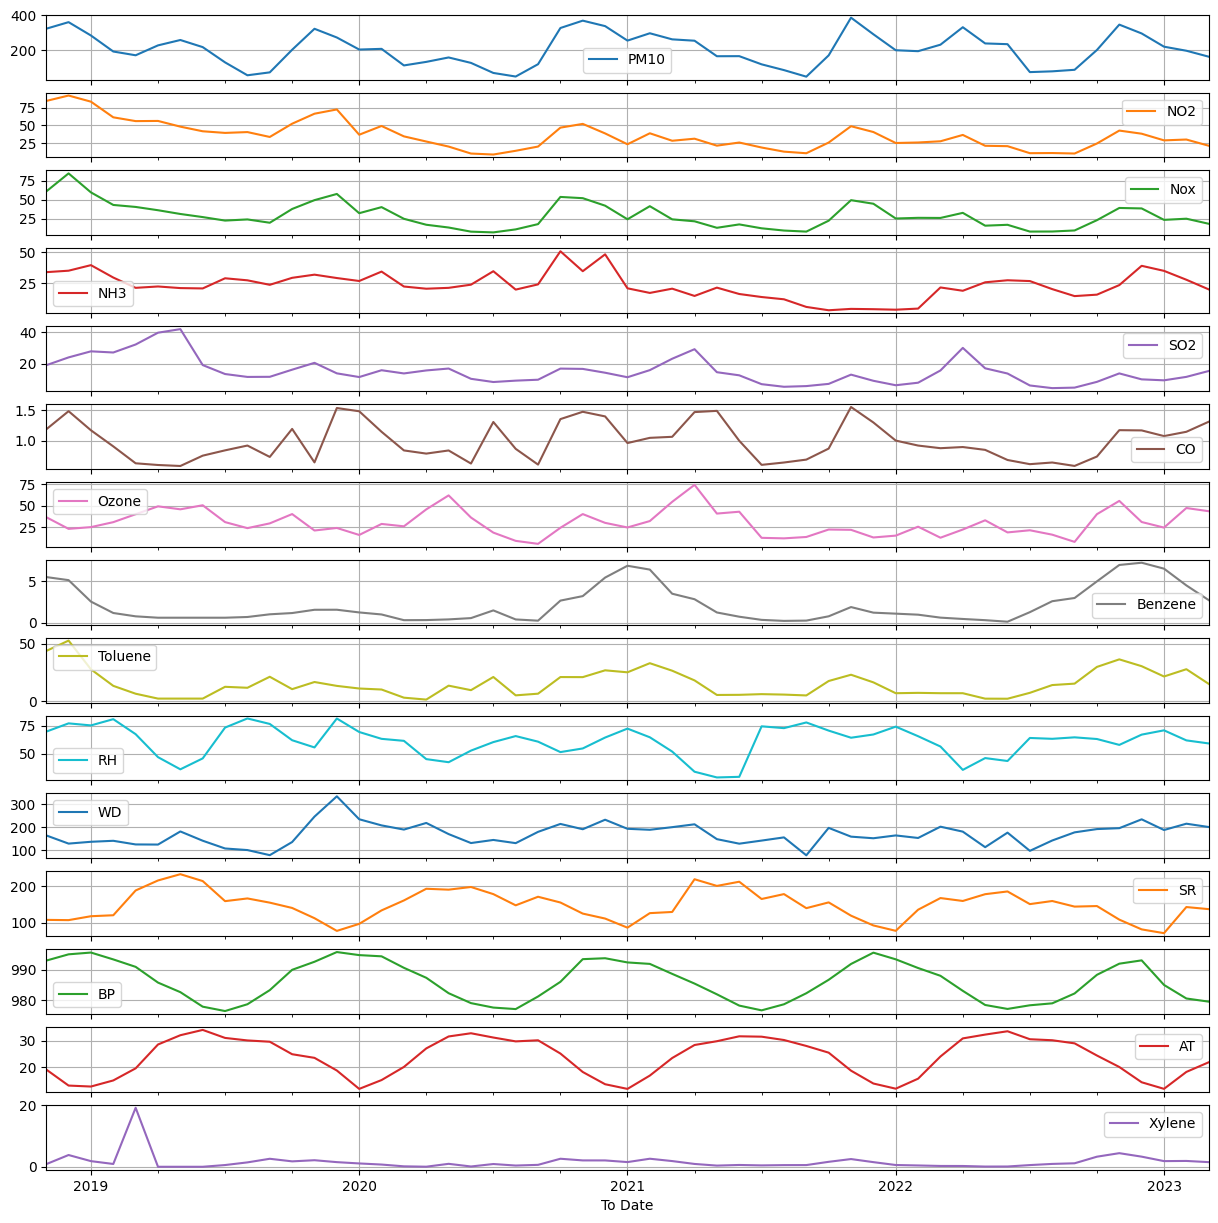

In [253]:
new_df.resample('M').mean().plot(subplots=True, figsize=(15, 15),grid=True)
plt.show()

In [286]:
#  making a copy of the dataframe which is resampled to monthly data
# aq_df_monthly = new_df.resample('M').mean()

In [288]:
# remove outliers from the new_df
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(new_df))
print(z)
threshold = 3
print(np.where(z > 3))
new_df = new_df[(z < 3).all(axis=1)]
new_df.shape

                         PM10       NO2       Nox       NH3       SO2  \
To Date                                                                 
2018-11-12 00:00:00  2.212106  2.475477  1.065432  1.514784  1.059061   
2018-11-13 00:00:00  1.329166  2.316731  1.113816  1.168921  0.114327   
2018-11-15 00:00:00  0.124508  3.134345  1.630817  1.212154  0.205791   
2018-11-16 00:00:00  0.325379  2.167441  1.125233  0.791065  0.190146   
2018-11-17 00:00:00  0.106962  1.322457  0.408172  0.556743  0.273186   
...                       ...       ...       ...       ...       ...   
2023-03-25 00:00:00  0.081419  0.572038  0.410005  0.456636  0.064984   
2023-03-26 00:00:00  1.031072  0.937800  0.865575  0.539643  0.099885   
2023-03-27 00:00:00  0.350496  1.066687  0.980283  0.620056  0.062584   
2023-03-28 00:00:00  0.510821  0.952729  0.903630  0.665018  0.144420   
2023-03-28 11:31:00  0.316274  0.428222  0.255612  0.592387  0.679967   

                           CO     Ozone   Benzene 

(1306, 15)

In [289]:
import pmdarima as pm

model = pm.auto_arima(new_df['Ozone'], 
                      m=12,seasonal=True,start_p=0, start_q=0,max_order=4,test='adf',trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=11358.277, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=9641.184, Time=0.78 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=10341.482, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=12963.338, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=9644.430, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=9632.188, Time=2.71 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=9633.792, Time=3.46 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=9637.149, Time=1.45 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=10913.582, Time=2.27 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=9603.725, Time=3.97 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=9612.076, Time=1.17 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=9605.240, Time=4.52 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=9608.885, Time=1.23 sec
 ARIMA(3,0,0)(2,0,0)

In [256]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1599
Model:               SARIMAX(4, 0, 1)   Log Likelihood               -5938.316
Date:                Wed, 12 Apr 2023   AIC                          11890.631
Time:                        01:38:43   BIC                          11928.271
Sample:                             0   HQIC                         11904.608
                               - 1599                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6508      0.257      2.535      0.011       0.148       1.154
ar.L1          1.3560      0.059     23.068      0.000       1.241       1.471
ar.L2         -0.3699      0.049     -7.565      0.000      -0.466      -0.274
ar.L3         -0.0720      0.037     -1.960      0.050      -0.144   -6.95e-06
ar.L4          0.0645      0.022      2.941      0.003       0.021       0.107
ma.L1         -0.7138      0.057    -12.554      0.000      -0.825      -0.602
sigma2        98.3673      1.806     54.456      0.000      94.827     101.908
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5222.46
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.25
Prob(H) (two-sided):                  0.06   Kurtosis:                        11.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [280]:
train=new_df[(new_df.index.get_level_values('To Date')>='2018-11-01') & (new_df.index.get_level_values('To Date')<='2022-10-01')]
test=new_df[(new_df.index.get_level_values('To Date')>'2022-10-01') & (new_df.index.get_level_values('To Date')<='2022-11-01')]


In [281]:
test

,PM10,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene
To Date,,,,,,,,,,,,,,,
2022-10-02,185.92,22.64,25.20,12.21,3.74,0.75,2.62,5.29,38.57,65.12,272.01,164.48,982.63,28.38,3.64
2022-10-03,145.62,15.76,15.76,12.18,5.11,0.48,3.10,5.22,27.95,62.13,260.52,168.68,982.95,28.61,3.12
2022-10-04,108.67,14.13,9.50,12.04,4.09,0.50,3.75,2.78,22.99,57.40,255.20,173.71,984.11,28.33,0.61
2022-10-05,144.75,23.06,16.23,13.31,5.04,0.66,6.59,3.61,26.00,61.69,253.26,154.51,985.51,28.10,1.39
2022-10-06,169.08,22.72,18.75,13.87,4.02,0.81,42.53,7.19,26.36,61.83,196.16,147.14,984.90,28.37,4.25
2022-10-07,55.04,9.28,7.10,12.21,5.68,0.56,22.95,2.10,7.22,62.57,87.54,140.78,986.25,26.09,0.68
2022-10-08,40.74,7.07,5.80,10.99,5.53,0.76,22.70,1.22,3.56,71.09,64.51,77.79,987.08,24.35,0.17
2022-10-09,33.54,6.30,5.13,10.67,5.83,0.51,22.35,1.20,4.44,78.22,65.81,33.01,987.52,22.54,0.11
2022-10-10,18.17,3.45,3.39,9.67,4.07,0.28,27.58,0.61,1.93,77.12,67.32,80.70,986.86,22.33,0.02


In [282]:
test.shape

(31, 15)

In [276]:
model.fit(train['Ozone'])

ARIMA(order=(4, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [283]:
forecast = model.predict(n_periods=31,return_conf_int=True)  # n_periods is the number of months for which we want to predict and return_conf_int is for confidence interval
forecast

(array([ 4.41988866,  5.72850577,  6.73026247,  7.45982433,  8.08133516,
         8.6496516 ,  9.19376868,  9.72169405, 10.23583047, 10.73647878,
        11.22371601, 11.69768925, 12.15865675, 12.60693381, 13.04285686,
        13.46676363, 13.87898551, 14.27984515, 14.66965611, 15.04872309,
        15.41734229, 15.7758017 , 16.12438134, 16.46335351, 16.79298301,
        17.11352734, 17.42523691, 17.72835521, 18.02311904, 18.30975866,
        18.58849798]),
 array([[-14.76612532,  23.60590263],
        [-17.13723031,  28.59424186],
        [-18.18082655,  31.64135149],
        [-18.57436737,  33.49401603],
        [-18.7823715 ,  34.94504181],
        [-18.90665665,  36.20595985],
        [-18.98680797,  37.37434533],
        [-19.03471726,  38.47810537],
        [-19.05589746,  39.5275584 ],
        [-19.0536482 ,  40.52660576],
        [-19.03072693,  41.47815894],
        [-18.98959609,  42.3849746 ],
        [-18.93247472,  43.24978822],
        [-18.86134071,  44.07520833],
       

In [284]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])
forecast_df

,Prediction
To Date,
2022-10-02,4.419889
2022-10-03,5.728506
2022-10-04,6.730262
2022-10-05,7.459824
2022-10-06,8.081335
2022-10-07,8.649652
2022-10-08,9.193769
2022-10-09,9.721694
2022-10-10,10.235830


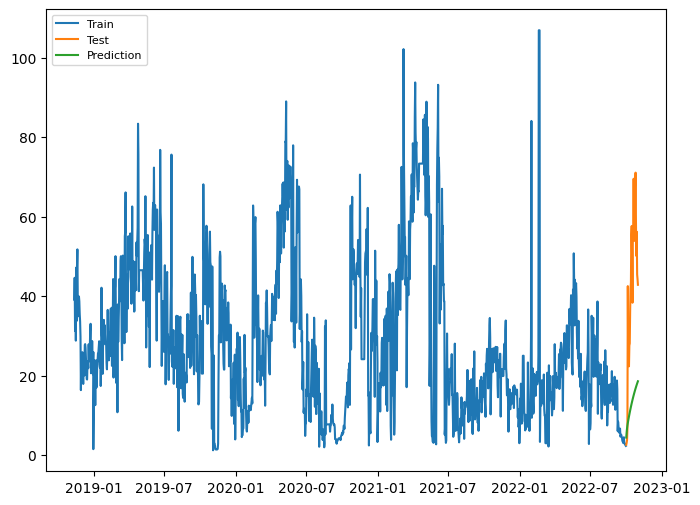

In [285]:
# Plot the predictions for validation set
plt.plot(train['Ozone'], label='Train')
plt.plot(test['Ozone'], label='Test')
plt.plot(forecast_df['Prediction'], label='Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()
